##### Regression
Models that with linear parameters

In [1]:
import numpy as np
import pandas as pd
import math as math
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from statistics import variance
from sklearn.linear_model import LinearRegression

plt.rcParams['figure.figsize'] = [15,7]
plt.rcParams['font.size'] = 22.0
plt.rcParams['legend.fontsize'] = 22
plt.rcParams['legend.title_fontsize'] = 22

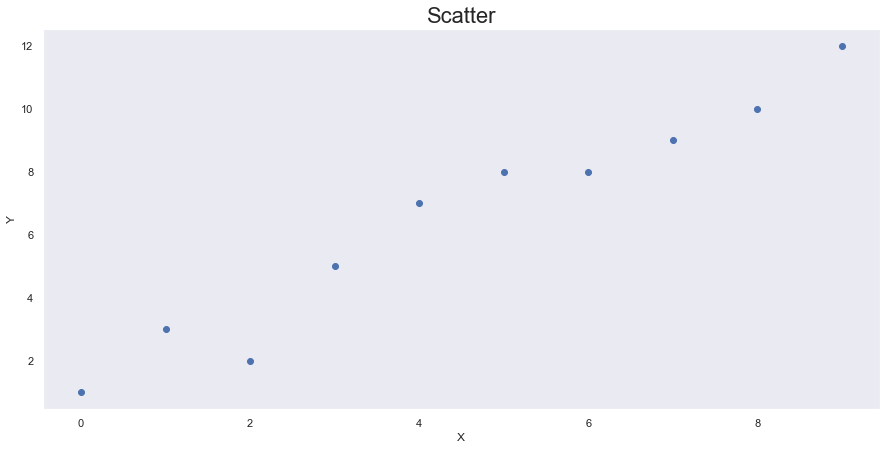

In [2]:

x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]) 
y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12]) 


plt.figure()
plt.scatter(x,y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter', fontsize = 22)
plt.grid()
plt.show()

Least squares method for coefficient estimation:
    $$
    \begin{cases}
    \hat{\beta}_1=\frac{\sum_{i=1}^n (x_i- \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n (x_i - \bar{x})^2} = \frac{S_{xy}}{S_{xx}}\\
    \hat{\beta}_0= \bar{y}-\hat{\beta_1}\bar{x}
    \end{cases}
    $$

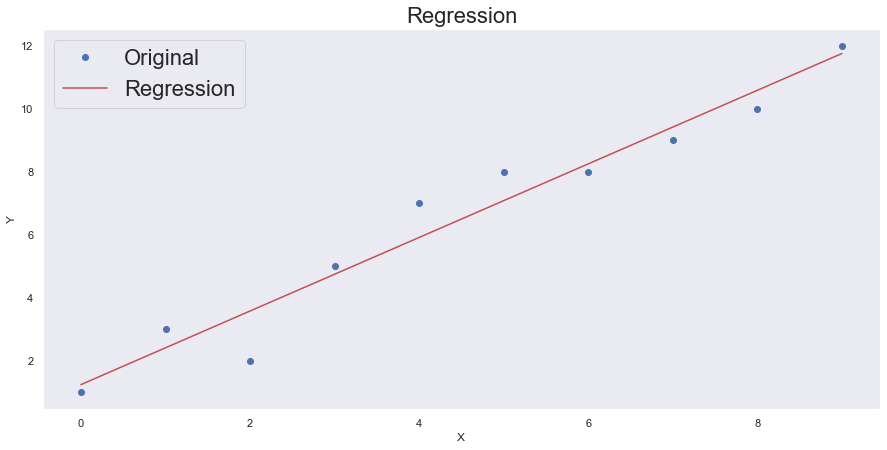

In [3]:
## estimate coefficients

def estimate_coef(x,y):
    size = len(x)
    m_x , m_y = np.mean(x), np.mean(y)
    s_xx = s_xy = 0
    
    # covariance and variance calculation
    for i in range(size):
        s_xx += (x[i]-m_x)**2
        s_xy += (x[i]-m_x)*(y[i]-m_y)
        
    b1 = s_xy / s_xx
    b0 = m_y - b1*m_x
    return b0,b1

coefs = estimate_coef(x,y)

y_pred = coefs[0] + x*coefs[1]

plt.figure()
plt.plot(x,y, 'bo', label = 'Original')
plt.plot(x,y_pred, label = 'Regression', color = 'r')
plt.title('Regression', fontsize = 22)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid()
plt.show()

One relevant measure is the $R^2$, pronounced "R squared", is the proportion of the variation in the dependent variable $Y$ that is predictable from the independent variable $X$.
$$
R^2 = \frac{S_{xy}^2}{S_{xx}S_{yy}}  = \frac{\left( \sum_{i=1}^n (x_i- \bar{x})(y_i - \bar{y})\right)^2}{\sum_{i=1}^n (x_i - \bar{x})^2\sum_{i=1}^n (y_i - \bar{y})^2}
$$

$R^2$ is equals the square of the **Pearson correlation coefficient**.

In [4]:
def R2(x,y):
    size = len(x)
    m_x , m_y = np.mean(x), np.mean(y)
    s_xx = s_xy = s_yy = 0
    
    # covariance and variance calculation
    for i in range(size):
        s_xx += (x[i]-m_x)**2
        s_xy += (x[i]-m_x)*(y[i]-m_y)
        s_yy += (y[i]-m_y)**2
        
    R2 = s_xy**2 / (s_xx * s_yy)
    return R2

R2(x,y)

0.952538038613988

Using Sklearn

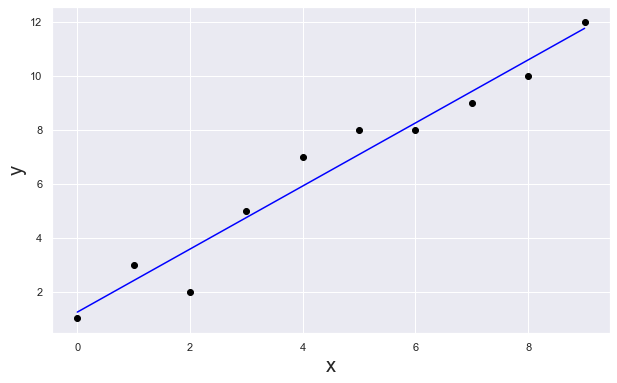

Estimated coefficients:
b_0 = 1.2363636363636363  
b_1 = 1.1696969696969697

Previous  coefficients:
b_0 = 1.2363636363636363  
b_1 = 1.1696969696969697

R2: 0.952538038613988


In [5]:
from sklearn.linear_model import LinearRegression

x = x.reshape(-1,1)

reg = LinearRegression().fit(x,y)

y_pred = reg.predict(x)

plt.figure(figsize=(10,6))
plt.plot(x, y, 'o', color='black');
plt.plot(x,y_pred,color='blue')
plt.xlabel('x', fontsize = 20) 
plt.ylabel('y', fontsize = 20) 
plt.show(True) 
print("Estimated coefficients:\nb_0 = {}  \nb_1 = {}".format(reg.intercept_, reg.coef_[0])) 
print("\nPrevious  coefficients:\nb_0 = {}  \nb_1 = {}".format(coefs[0], coefs[1])) 

print('\nR2:', reg.score(x,y))

# Hypothesis testing

$$
H_0:\beta_1 = 0
$$
$$
H_1: \beta_1 \neq 0
$$

In [6]:
import statsmodels.api as sm

print("Estimated coefficients:\nb_0 = {}  \nb_1 = {}".format(reg.intercept_, reg.coef_[0])) 

x_with_intercept = np.c_[np.ones(x.shape[0]), x]

x_with_intercept
sm.OLS(y, x_with_intercept).fit().summary() # OLS = ordinary least squares

Estimated coefficients:
b_0 = 1.2363636363636363  
b_1 = 1.1696969696969697


C:\Users\Marcelo\Anaconda3\envs\r-tutorial\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     160.6
Date:                Wed, 08 Sep 2021   Prob (F-statistic):           1.41e-06
Time:                        12:05:25   Log-Likelihood:                -11.312
No. Observations:                  10   AIC:                             26.62
Df Residuals:                       8   BIC:                             27.23
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2364      0.493      2.509      0.036       0.100       2.373
x1             1.1697      0.092     12.671      0.000       0.957       1.383
==============================================================================
Omnibus:                        0.948   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.622   Jarque-Bera (JB):                0.392
Skew:                          -0.461   Prob(JB):                        0.822
Kurtosis:                       2.702   Cond. No.                         10.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Regressão linear múltipla

O modelo de regressão linear multivariado é definido por:<br>
$$
Y_j=\beta_0 + \beta_1 X_{1j} + \beta_2 X_{2j} + \beta_3 X_{3j}+\beta_4 X_{4j} + \epsilon_j.
$$
onde:
- $Y_j$: variável resposta (dependente),
-  $\beta_i$: parâmetros desconhecidos,
-  $X_{ij}$: variáveis explicativas (covariáveis, variáveis independentes),
-  $\epsilon_j$: erro aleatório.

Nesse modelo, temos as seguintes suposições:
-  $E(\epsilon_j)=0$ para $ j=1,\ldots,n$,
-  $Var(\epsilon_j) = \sigma^2$ para $ j=1,\ldots,n$,
-  $Cov(\epsilon_i,\epsilon_j)=0$ para $ i,j=1,\ldots,n$ e $i\neq j$.

Na forma matricial:

$$Y=\left[\begin{array}{c}Y_1\\ Y_2\\ \vdots \\ Y_n\end{array}\right], \ 
X = \left[\begin{array}{cccc}
1 & X_{11} & \ldots & X_{1k} \\ 
1 & X_{21} & \ldots & X_{2k} \\
\vdots & \vdots & \ddots & \vdots\\
1 & X_{n1} & \ldots & X_{np} \\
\end{array}\right], \beta = \left[\begin{array}{c}\beta_0\\ \beta_1\\\vdots \\ \beta_p\end{array}\right], \  \epsilon = \left[\begin{array}{c}\epsilon_1\\ \epsilon_2\\\vdots \\ \epsilon_n\end{array}\right]
$$  

ou seja, 

$$Y_{n\times 1} = X_{n\times (p+1)} \beta_{(p+ 1)\times 1} + \epsilon_{n\times 1}. $$


Para o caso multivariado, a estimação dos coeficientes pelos métodos:

- Método de mínimos quadrados ordinários (EMQ ou MQO) <br>

- Método de máxima verossimilhança (EMV)<br>

Resulta na relação:
$$
\hat{\beta} = (\text{X}^T \text{X})^{-1} \text{X}^T \text{y}
$$

- $\beta_0$: valor esperado de $Y$ quando $X_{1i}, X_{2i}, \ldots, X_{pi}$ são todas zero.

- $\beta_k$: aumento esperado em $Y$ quando $X_k$ é acrescido de uma unidade e todas as outras são mantidas fixadas, $k=1,\ldots,p$.

No modelo linear geral
$$
Y = X \beta + \epsilon
$$

com as suposições:
- $E( \epsilon) = {0}$,
- $Var( \epsilon) = \sigma^2 I$,


o **estimador de mínimos quadrados** que minimiza a soma de quadrados dos resíduos, é dado por

$$\widehat{\beta} = (X ^{\top} X)^{-1} X ^{\top} Y.$$

			
Se $\epsilon\sim N({0},\sigma^2 I)$, então
			
o **estimador de máxima verossimilhança** de $\beta$ é dado (também) por

$$\widehat{\beta} = (X^{\top} X)^{-1} X^\top Y.$$

Nesse caso, 

$$\widehat{\beta} \sim N\left(\beta, \sigma^2 (X^\top X)^{-1}\right)$$

e é comum estimar $\sigma^2$ com


$$\widehat{\sigma}^2 = MSE.$$
			

O valor ajustado de $Y$, para um determinado $X = x$ é dado por: 
$$\hat{Y} = x {\hat{\beta}}.$$

O erro quadrático médio, MSE, é usado para estimar $\sigma^2$:
$$\hat{\sigma}^2 = \displaystyle{\frac{SQE}{n-p}} =  \displaystyle{\frac{\displaystyle\sum_{i=1}^{n}(Y-\hat{Y})^\top(Y-\hat{Y})  }{n-k}} 
$$

O coeficiente de determinação, ou coeficiente de explicação do modelo, é dado por

$$
R^2 = 1 - \displaystyle {\frac{SQE}{SQT}},
$$
em que $SQT = Y^\top Y  -  \displaystyle\frac{1}{n}Y^\top \mathbb{1}^\top \mathbb{1} Y$, em que $\mathbb{1}$ indica um vetor de uns de mesma dimensão de $Y$.

Para levar em conta o aumento da explicação da variabilidade da resposta quando aumentamos o número de covariáveis, é comum considerar o coeficiente de determinação do modelo ajustado:


$$R^2_{ajustado} = 1 - \displaystyle {\frac{n-1}{n-p}\frac{SQE}{SQT}}.$$


Tanto $R^2$ quanto $R^2_{ajustado}$ estão entre 0 e 1, e pode ser usado como um **indício** de qualidade do ajuste, quanto maior o coeficiente de determinação, melhor é o modelo linear. 




In [7]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

n = 50 #number of observations

#randomly generated data
x1 = np.random.uniform(0,1, (n, 1)); ## generate a 2D array
x2 = np.random.uniform(0,1, (n,1));
er = np.random.uniform(0,0.5, (n, 1))
y = x1 + x2 + er

X = np.hstack((x1, x2))
X = np.hstack((np.ones((n, 1)), X ))

o **estimador de mínimos quadrados** que minimiza a soma de quadrados dos resíduos, é dado por

$$\widehat{\beta} = (X ^{\top} X)^{-1} X ^{\top} Y.$$

Beta: [[0.21236891]
 [1.00843464]
 [1.06578073]]
R2: 0.9082522490029863


<ipython-input-8-04cc9cb6bfbd>:19: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


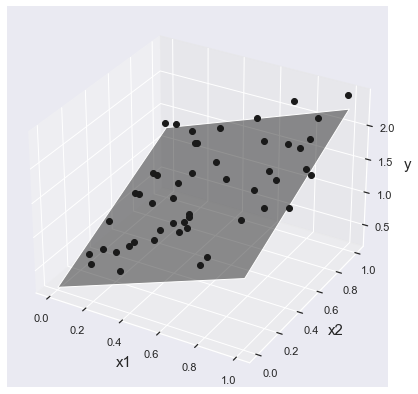

In [8]:
#calculating of the beta using the normal equation
beta = np.dot(np.dot(np.linalg.pinv(np.dot(X.transpose(), X)), X.transpose()), y)
print('Beta:',beta)

from sklearn.metrics import r2_score
y_pred = np.dot(X, beta)
R2 = r2_score(y, y_pred)
print('R2:', R2)

#plane calculation
k = 2#size of the plane
p1, p2 = np.mgrid[:k, :k]
P = np.hstack(( np.reshape(p1, (k*k, 1)), np.reshape(p2, (k*k, 1))))
P = np.hstack(( np.ones((k*k, 1)), P))
plane = np.reshape(np.dot(P, beta), (k, k));

#plotting
fig = plt.figure(figsize=(15,7))
ax = fig.gca(projection='3d')
ax.plot(x1[:,0],x2[:,0],y[:,0],'ko') #scatter plot
ax.plot_surface(p1,p2,plane, color='gray',alpha=.5) #plane plot
ax.set_xlabel('x1', fontsize = 15)
ax.set_ylabel('x2', fontsize = 15)
ax.set_zlabel('y', fontsize = 15)
plt.savefig('regress-3d.svg')
plt.show()

## Variáveis não lineares

Notem que o modelo não precisa ter termos lineares em X, mas apenas nos parâmetros. Por exemplo, modelo abaixo ainda é linear nos parâmetros: $$y = \beta_0 + \beta_1 x + \beta_2 x^2 + \epsilon$$

Vamos considerar um exemplo.

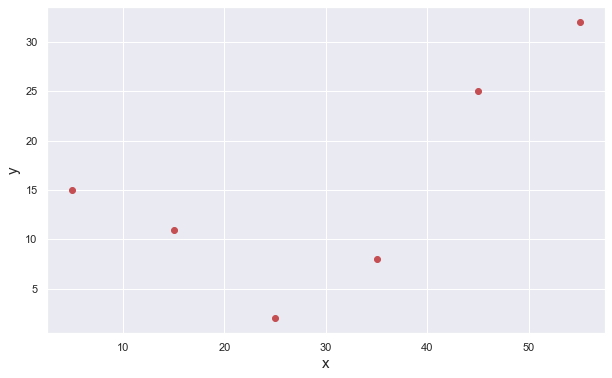

In [9]:
x = np.array([5, 15, 25, 35, 45, 55])
y = np.array([15, 11, 2, 8, 25, 32])
plt.figure(figsize=(10,6))
plt.plot(x,y, 'ro')
plt.ylabel("y", fontsize=15)
plt.xlabel("x", fontsize=15)

plt.show(True)

Daí é só gerar uma coluna com os dados ao quadrado, lembre-se a regressão tem que ser linear nos coeficientes e não nas covariáveis

Dados originais:
 [[ 5]
 [15]
 [25]
 [35]
 [45]
 [55]]
Novos dados:
 [[   5.   25.]
 [  15.  225.]
 [  25.  625.]
 [  35. 1225.]
 [  45. 2025.]
 [  55. 3025.]]
Estimated coefficients:
b_0 = 21.37232142857144  
b_i = [-1.32357143  0.02839286]


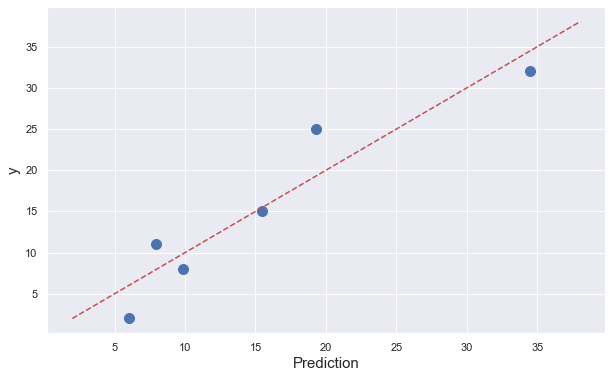

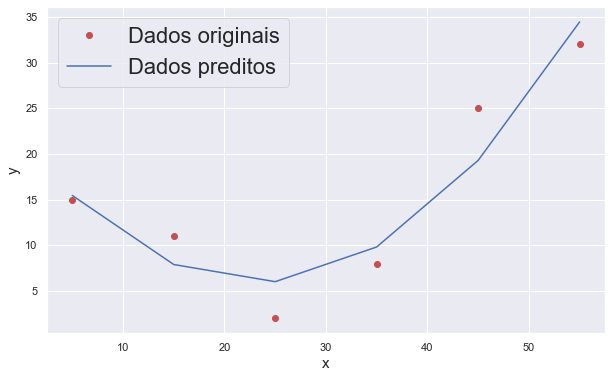

In [10]:
from sklearn.preprocessing import PolynomialFeatures

transformer = PolynomialFeatures(degree=2, include_bias=False)
x = x.reshape((-1, 1))
transformer.fit(x)
print('Dados originais:\n', x)

# transforma os dados incluindo uma nova coluna com valores quadráticos
x_ = transformer.transform(x)
print('Novos dados:\n', x_)

model = LinearRegression().fit(x_, y)
y_pred = model.predict(x_)

print("Estimated coefficients:\nb_0 = {}  \nb_i = {}".format(model.intercept_, model.coef_)) 


plt.figure(figsize=(10,6))
l = plt.plot(y_pred, y, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')

plt.ylabel("y", fontsize=15)
plt.xlabel("Prediction", fontsize=15)

# mostra a reta diagonal, que representa a predição perfeita
xl = np.arange(min(y), 1.2*max(y),(max(y)-min(y))/10)
yl = xl
plt.plot(xl, yl, 'r--')

plt.show()

plt.figure(figsize=(10,6))
plt.plot(x,y, 'ro', label='Dados originais')
plt.plot(x,y_pred, 'b-', label = 'Dados preditos')
plt.ylabel("y", fontsize=15)
plt.xlabel("x", fontsize=15)
plt.legend()
plt.show(True)

## Predizendo o preço de casas

Vamos considerar dados reais e a biblioteca scikit-learn. Inicialmente, carregamos os dados.

In [11]:
# le os dados
data = pd.read_csv('data/BostonHousing.csv', header=(0))
# valor a ser predito
ylabel = data.columns[-1]
print("Número de linhas e colunas:", data.shape)
print(data.head(10))
data = data.to_numpy()

Número de linhas e colunas: (506, 14)
      crim    zn  indus  chas    nox     rm    age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575   65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421   78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185   61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998   45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147   54.2  6.0622    3  222     18.7   
5  0.02985   0.0   2.18     0  0.458  6.430   58.7  6.0622    3  222     18.7   
6  0.08829  12.5   7.87     0  0.524  6.012   66.6  5.5605    5  311     15.2   
7  0.14455  12.5   7.87     0  0.524  6.172   96.1  5.9505    5  311     15.2   
8  0.21124  12.5   7.87     0  0.524  5.631  100.0  6.0821    5  311     15.2   
9  0.17004  12.5   7.87     0  0.524  6.004   85.9  6.5921    5  311     15.2   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21

In [12]:
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]

from sklearn.model_selection import train_test_split
# divide o conjunto em treinamento e teste
p = 0.3 # fracao e elementos no conjnto de teste
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = 42)

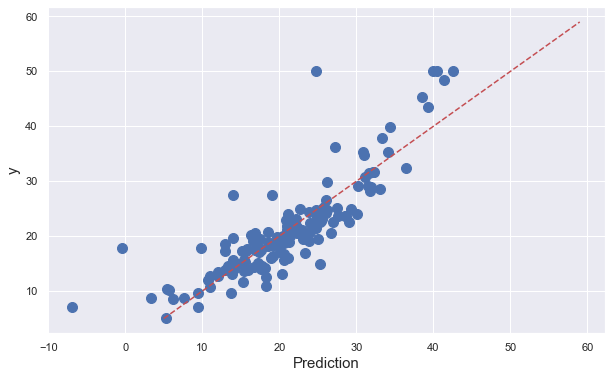

R2: 0.7112260057484908


In [13]:
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols

# modelo de regressão linear múltipla
lm = LinearRegression()
lm.fit(x_train, y_train)

y_pred = lm.predict(x_test)


plt.figure(figsize=(10,6))
l = plt.plot(y_pred, y_test, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')

plt.ylabel("y", fontsize=15)
plt.xlabel("Prediction", fontsize=15)

# mostra os valores preditos e originais
xl = np.arange(min(y_test), 1.2*max(y_test),(max(y_test)-min(y_test))/10)
yl = xl
plt.plot(xl, yl, 'r--')
plt.show(True)

R2 = r2_score(y_test, y_pred)
print('R2:', R2)

In [ ]:
#Ajusta o modelo de regressão linear simples para o preço das casas
mod = ols('medv~crim + zn +indus + chas + nox + rm + age +dis +rad +tax +ptratio + b + lstat',data=data)
res = mod.fit()
print(res.summary())

ERROR! Session/line number was not unique in database. History logging moved to new session 521


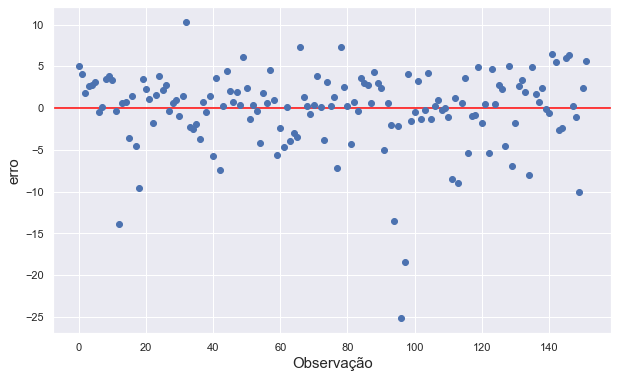

In [14]:
e = np.array(y_pred - y_test)
t = np.arange(0,len(e))
plt.figure(figsize=(10,6))
plt.axhline(y=0, color = 'red')
plt.plot(t,e,'o')
plt.ylabel("erro", fontsize=15)
plt.xlabel("Observação", fontsize=15)

plt.show(True)